# Ch2:Absenteeism at Work

## Import libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("data\Absenteeism_at_work.csv",sep=";")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.shape

(740, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


## Data Preprocessing

Changing Month of absence, Day of the week, Education, Social drinker, Social smoker and Disciplinary failure "From Attribute Information file"

In [6]:
month_map = {1: "January", 2: "February", 3: "March",4: "April", 5: "May", 6: "June", 7: "July",\
            8: "August", 9: "September", 10: "October",11: "November", 12: "December", 0: "Unknown"}
day_map = {2:'Monday' , 3:'Tuesday' , 4:'Wednesday' , 5:'Thursday' , 6:'Friday'}
education_map = {1:'High School', 2:'Graduate', 3:'Postgraduate', 4:'Master and Doctor'}
yes_no_map = {0:'No', 1:'Yes'}

df['Month of absence'] = df['Month of absence'].apply(lambda x: month_map[x])
df['Day of the week'] = df['Day of the week'].apply(lambda x: day_map[x])
df['Education'] = df['Education'].apply(lambda x: education_map[x])
df['Social drinker'] = df['Social drinker'].apply(lambda x: yes_no_map[x])
df['Social smoker'] = df['Social smoker'].apply(lambda x: yes_no_map[x])
df['Disciplinary failure'] = df['Disciplinary failure'].apply(lambda x: yes_no_map[x])

Changing season names as this (1:'summer', 2:'fall', 3:'winter', 4:'spring') "From UCI file"

In [7]:
season_map = {1:'Summer', 2:'Fall', 3:'Winter', 4:'Spring'}
df['Seasons'] = df['Seasons'].apply(lambda x: season_map[x])

In [8]:
df.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Summer,Summer,Summer,Summer,Summer
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


## Identifying Reasons for Absence

Define a function that returns Yes if a provided encoded value is contained in the ICD (values 1 to 21); otherwise, No

Then plot it

In [9]:
def ICD(val):
    return "Yes" if val>=1 and val<21 else "No"

In [10]:
df['ICD'] = df['Reason for absence'].apply(ICD)

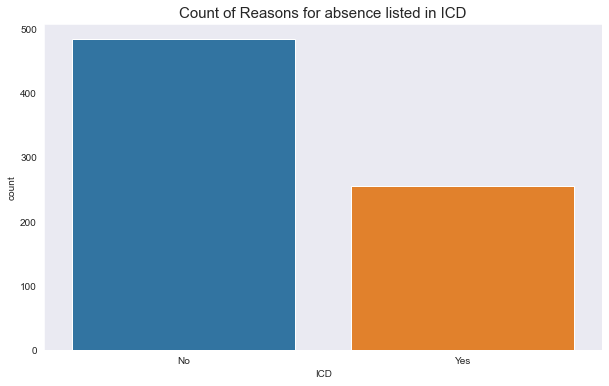

In [11]:
plt.figure(figsize=(10,6))
sns.set_style("dark")
sns.countplot(data=df, x='ICD');
plt.title('Count of Reasons for absence listed in ICD',fontsize=15);

As we can see, the number of reasons for absence that are not listed in the ICD table is almost twice the number of listed ones